# 1.Install Dependencies And Bring in Data


In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

In [ ]:
import os
!pip install pandas
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

In [6]:
df.iloc[3]['comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [7]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

# 2.PREPROCESS

In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
TextVectorization??

In [10]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [11]:
MAX_FEATURES = 200000 #NUMBER OF WORDS IN THE VOCAB

In [12]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length = 1800,output_mode='int')

In [13]:
vectorizer.adapt(X.values)

In [14]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275], dtype=int64)>

In [15]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [16]:
vectorized_text = vectorizer(X.values)

In [17]:
len(X)

159571

In [18]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [19]:
#MCSHBAP - map, chache, shuffle, batch, prefetch from_tensor_slices, List_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)#helps bottlenects

In [20]:
dataset.as_numpy_iterator().next()

(array([[ 823, 2974,    4, ...,    0,    0,    0],
        [ 386,    2,   24, ...,    0,    0,    0],
        [  21,  301,    3, ...,    0,    0,    0],
        ...,
        [1782,  490,   34, ...,    0,    0,    0],
        [   7,  225, 1770, ...,    0,    0,    0],
        [  46,   33,   15, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [21]:
batch_X,batch_y = dataset.as_numpy_iterator().next()

In [22]:
batch_X #batch is vectorized text examples #batch_X.shape

array([[   451,   2217, 129107, ...,      0,      0,      0],
       [     7,    119,      3, ...,      0,      0,      0],
       [     8,     51,    514, ...,      0,      0,      0],
       ...,
       [     8,     69,     12, ...,      0,      0,      0],
       [  1062,   1058,    179, ...,      0,      0,      0],
       [    12,      9,      6, ...,      0,      0,      0]], dtype=int64)

In [23]:
batch_y.shape

(16, 6)

In [24]:
len(dataset)

9974

In [25]:
len(dataset)*16

159584

In [26]:
int(len(dataset)*.7)

6981

In [27]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [28]:
train_generator = train.as_numpy_iterator()

In [29]:
train_generator.next()

(array([[  49,   61,   55, ...,    0,    0,    0],
        [  20,    7,    6, ...,    0,    0,    0],
        [  10,    5, 1028, ...,    0,    0,    0],
        ...,
        [ 358,   12,    9, ...,    0,    0,    0],
        [  48,   11,   29, ...,    0,    0,    0],
        [  82,    8,  660, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

## 3.Create Sequential Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout, Bidirectional,Dense,Embedding

In [31]:
y[0]#y.shape

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
model = Sequential()
#Create the embedding Layer
model.add(Embedding(MAX_FEATURES+1,32))
#bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation = 'tanh')))
#Feature extractor Fully connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#Final Layer
model.add(Dense(6, activation='sigmoid'))

In [33]:
model.compile(loss='BinaryCrossentropy', optimizer = 'Adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [ ]:
history = model.fit(train, epochs = 1, validation_data = val)

3694/6981 [==============>...............] - ETA: 48:26 - loss: 0.0731

In [36]:
history.history

{'loss': [0.0627034530043602], 'val_loss': [0.04539046809077263]}

In [37]:
!pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/95/b6/9a5133deb5838c4dbe3ea27e8dba123622aa5112d43a079e9587636b4faf/fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     --------------- ----------------------- 61.4/154.1 kB 1.7 MB/s eta 0:00:01
     --------------------------- ---------- 112.6/154.1 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 154.1/154.1 kB

In [38]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

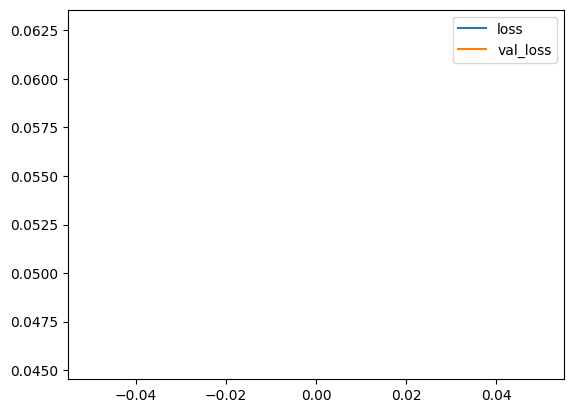

In [39]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 4.Make Predictions

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hurt you')

In [ ]:
input_text

In [ ]:
np.expand_dims(input_text,0)

In [ ]:
df.columns

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_X,batch_y = test.as_numpy_iterator().next()

In [ ]:
model.predict(np.expand_dims(input_text,0))

In [ ]:
res = model.predict(np.expand_dims(input_text,0))

In [ ]:
res

# 5.Evaluation Model

In [ ]:
from tensorflow.keras.metircs import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iteration():
    #unpack the batch
    x_true, y _true = batch
    #Make a prediction
    yhat = model.predict(X_true)
    
    #Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

# 5.Test and Gradio

In [ ]:
!pip install gradio jinja2

In [ ]:
import tensorflow as tf
import gradio as gr 

In [ ]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
input_str = vectorizer('hey i freaken hate you!')

In [ ]:
res = model.predict(np.expand_dims(input_str,0))

In [ ]:
df.columns[2:]

In [ ]:
res

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text


In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)